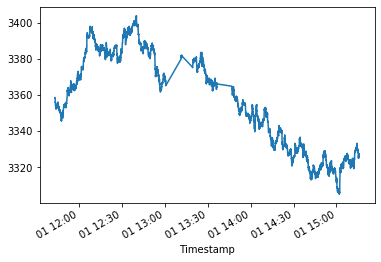

In [3]:
#https://www.youtube.com/watch?v=DamIIzp41Jg
import pandas as pd

df = pd.read_csv("datasets/market_data.csv") # df = data frame
df["Timestamp"] = pd.to_datetime(df["Timestamp"]) # ?/ what does this change in my graph = Convert argument to datetime.
ESX_df = df[ df['Instrument'] == "ESX-FUTURE" ]
ESX_df.set_index("Timestamp", inplace=True) # when inplace=False, it prints the df
ESX_df["Bid Price"].plot()

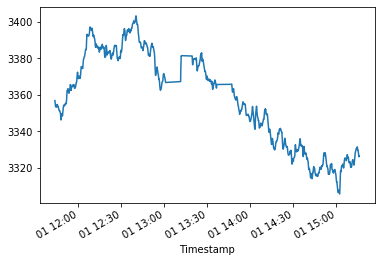

In [4]:
ESX_df.sort_index(inplace=True) # Pandas dataframe.sort_index() function sorts objects by labels along the given axis. For more: https://www.geeksforgeeks.org/python-pandas-dataframe-sort_index/
ESX_df["Bid Price"].rolling(25).mean().plot() # The mean() function is used to return the mean(ortalama) of the values for the requested axis.
#ESX_df["Ask Price"].rolling(25).mean().plot()

In [5]:
ESX_df["price25ma"] = ESX_df["Bid Price"].rolling(25).mean()

c:\users\mbt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
ESX_df.head(3)

,Unnamed: 0,Instrument,Bid Price,Bid Volume,Ask Price,Ask Volume,price25ma
Timestamp,,,,,,,
2020-03-01 11:43:08,0,ESX-FUTURE,3358.50,2032,3358.75,1441,NaN
2020-03-01 11:43:09,3,ESX-FUTURE,3358.75,1571,3359.00,1902,NaN
2020-03-01 11:43:10,4,ESX-FUTURE,3358.75,2697,3359.00,776,NaN


In [7]:
ESX_df.tail(3)

,Unnamed: 0,Instrument,Bid Price,Bid Volume,Ask Price,Ask Volume,price25ma
Timestamp,,,,,,,
2020-03-01 15:15:58,22039,ESX-FUTURE,3327.25,3006,3327.50,479,3326.49
2020-03-01 15:15:58,22040,ESX-FUTURE,3327.50,347,3327.75,3138,3326.56
2020-03-01 15:16:00,22044,ESX-FUTURE,3327.25,2805,3327.50,680,3326.62


In [8]:
ESX_df.dropna().head(3) # dropna() method rmeoves any rows that have any values a not or NaN's. Drops the missing data 

,Unnamed: 0,Instrument,Bid Price,Bid Volume,Ask Price,Ask Volume,price25ma
Timestamp,,,,,,,
2020-03-01 11:43:33,50,ESX-FUTURE,3354.25,1456,3354.5,2017,3356.87
2020-03-01 11:43:34,53,ESX-FUTURE,3354.25,1505,3354.5,1968,3356.70
2020-03-01 11:43:36,55,ESX-FUTURE,3354.25,914,3354.5,2559,3356.52


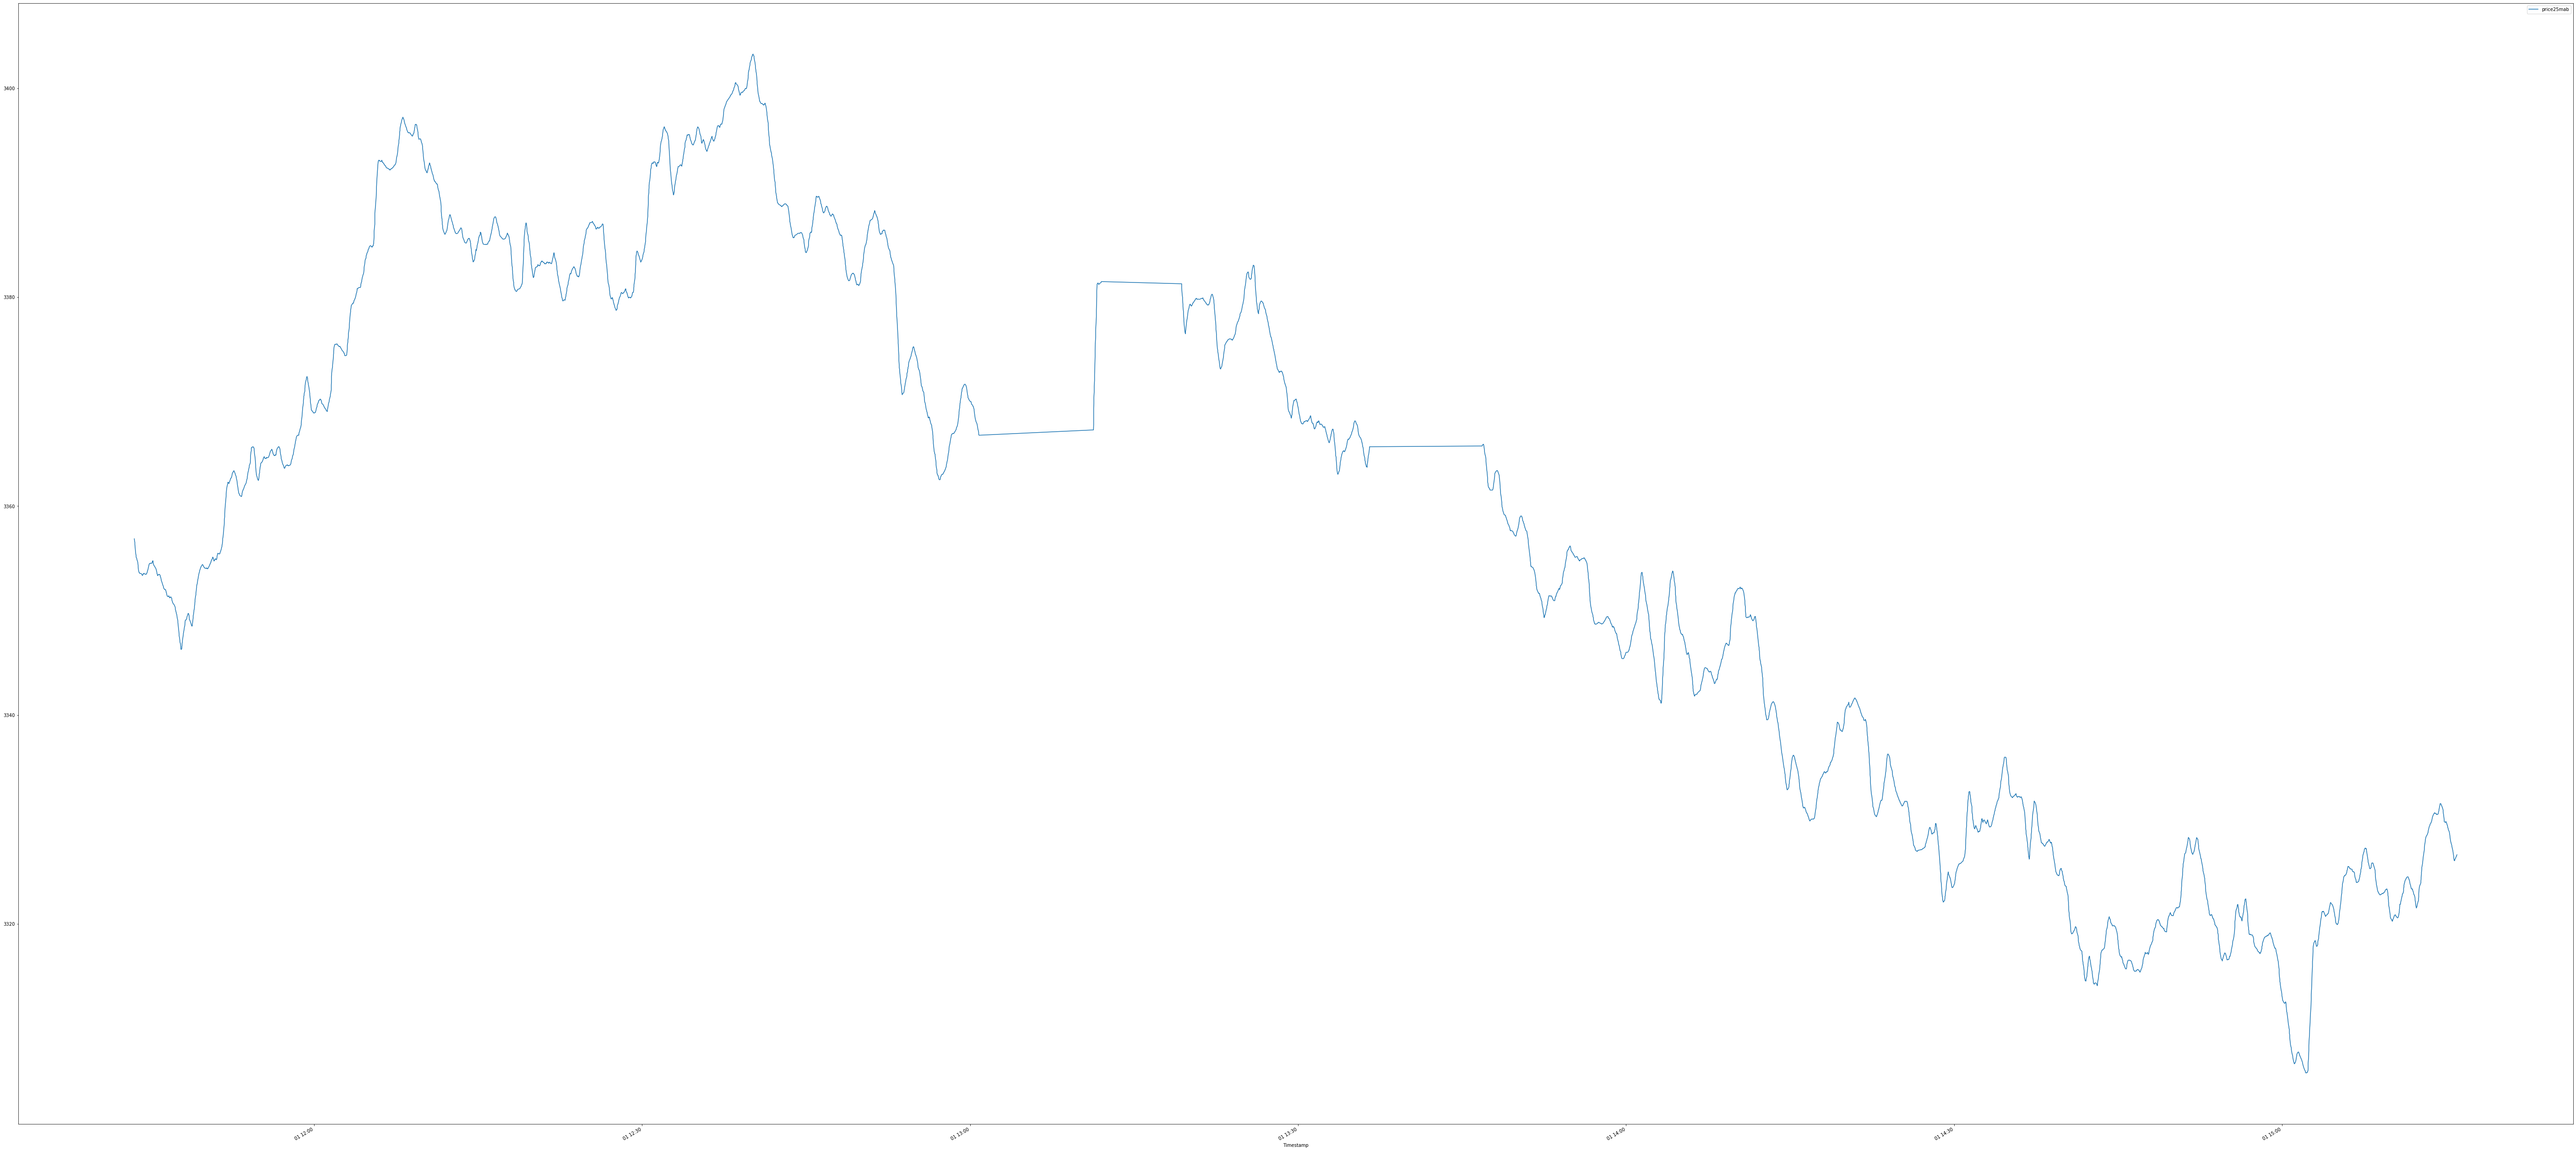

In [52]:
ESX_df = df.copy()[df["Instrument"] == "ESX-FUTURE"]
ESX_df.set_index("Timestamp", inplace=True)
ESX_df.sort_index(inplace=True)
ESX_df["price25mab"] = ESX_df["Bid Price"].rolling(25).mean()
ESX_df["price25maa"] = ESX_df["Ask Price"].rolling(25).mean()

ESX_df["price25mab"].plot(figsize=(100,50), legend=True)

In [10]:
list(set(df["Instrument"].values.tolist())) # set() method is used to convert any of the iterable to the distinct element and sorted sequence of iterable elements, commonly called Set. list() puts the data in the list

['ESX-FUTURE', 'SP-FUTURE']

In [11]:
df["Instrument"].unique() # pandas .unique() function makes the statement above simpler

array(['ESX-FUTURE', 'SP-FUTURE'], dtype=object)

In [55]:
graph_df = pd.DataFrame() # Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns)
graphESX_df = pd.DataFrame()
graphSP_df = pd.DataFrame()

for Instrument in df["Instrument"].unique():
    print(Instrument)
    Instr_df = df.copy()[df["Instrument"] == Instrument]
    Instr_df.set_index("Timestamp", inplace=True)
    Instr_df.sort_index(inplace=True)
    Instr_df[f'{Instrument}_price25mab'] = Instr_df["Bid Price"].rolling(25).mean() # f'{} https://realpython.com/python-f-strings/
    Instr_df[f'{Instrument}_price25maa'] = Instr_df["Ask Price"].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = Instr_df[[f'{Instrument}_price25mab', f'{Instrument}_price25maa']]
        #+ Instr_df[[f'{Instrument}_price25maa']]
        #raphSP_df = Instr_df[[f'{Instrument}_SP-FUTURE_price25mab', f'{Instrument}_SP-FUTURE_price25maa']]
        #raphESX_df = Instr_df[[f'{Instrument}_ESX-FUTURE_price25mab', f'{Instrument}_ESX-FUTURE_price25maa']]
        
    else:
        graph_df = graph_df.join(Instr_df[[f'{Instrument}_price25mab', f'{Instrument}_price25maa']])
        #+ graph_df.join(Instr_df[f'{Instrument}_price25maa'])

ESX-FUTURE
SP-FUTURE


In [61]:
graph_df.tail()

,ESX-FUTURE_price25mab,ESX-FUTURE_price25maa,SP-FUTURE_price25mab,SP-FUTURE_price25maa
Timestamp,,,,
2020-03-01 15:15:57,3326.47,3326.72,2913.16,2913.41
2020-03-01 15:15:57,3326.47,3326.72,2913.09,2913.34
2020-03-01 15:15:58,3326.49,3326.74,NaN,NaN
2020-03-01 15:15:58,3326.56,3326.81,NaN,NaN
2020-03-01 15:16:00,3326.62,3326.87,NaN,NaN


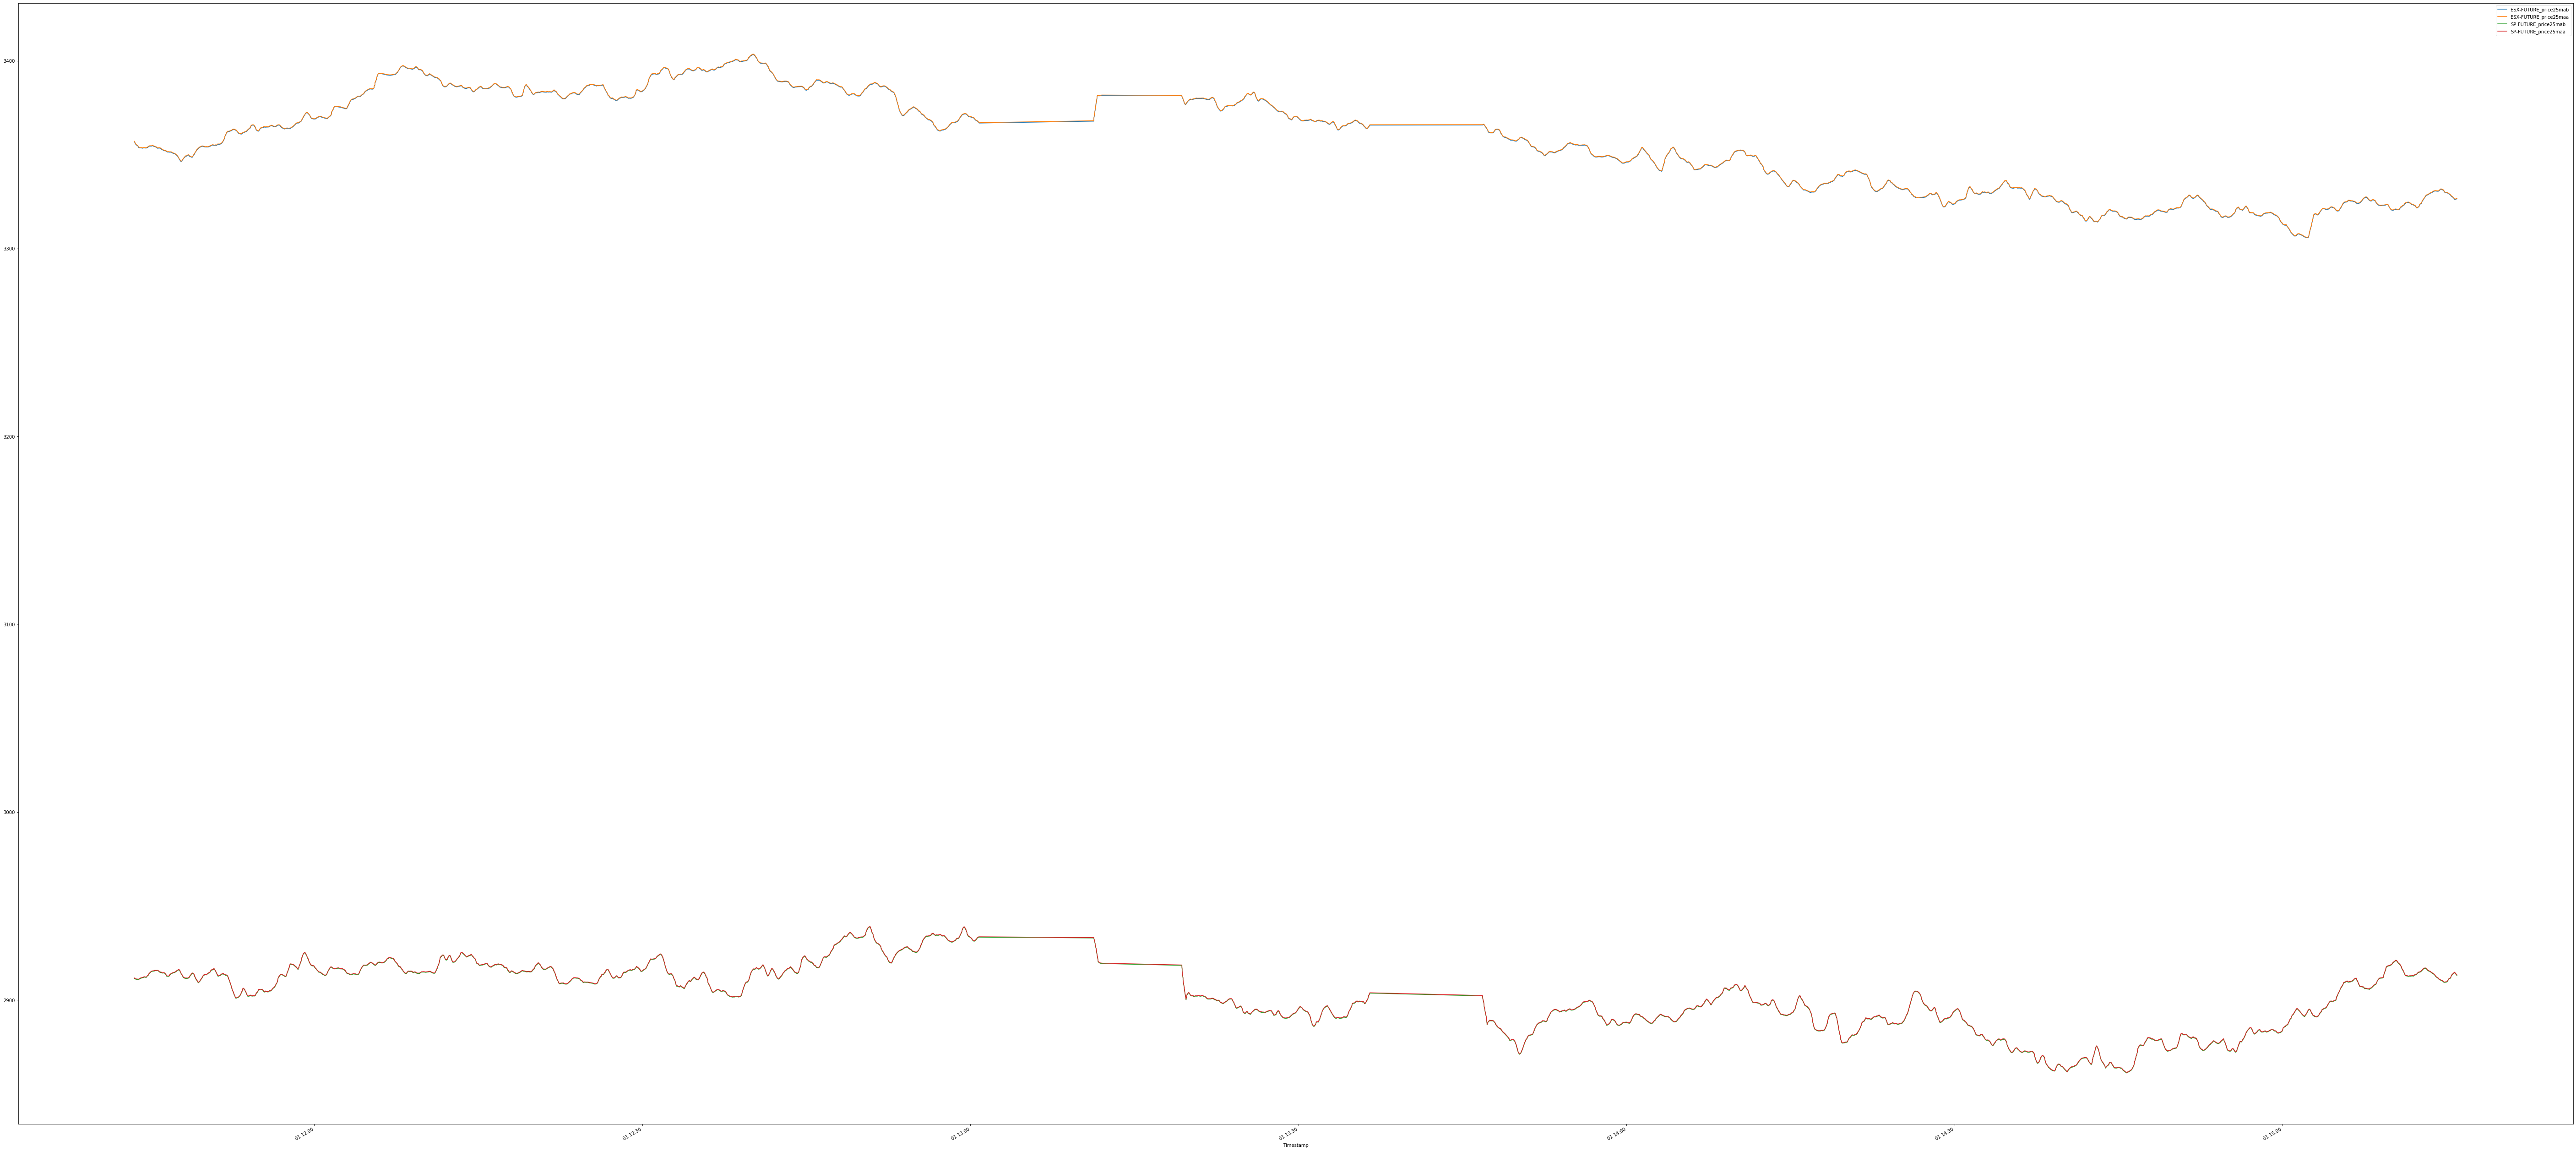

In [75]:
graph_df.dropna().plot(figsize=(100,50), legend=True) # legends are the information about colours

In [ ]:
graph_df.dropna().head()

In [19]:
# add sells to the graph
# combine with trades
# try working with the client where you have to pull data
# no need for candle sticks

In [68]:
graph_dfESX = graph_df[['ESX-FUTURE_price25mab', 'ESX-FUTURE_price25maa']]

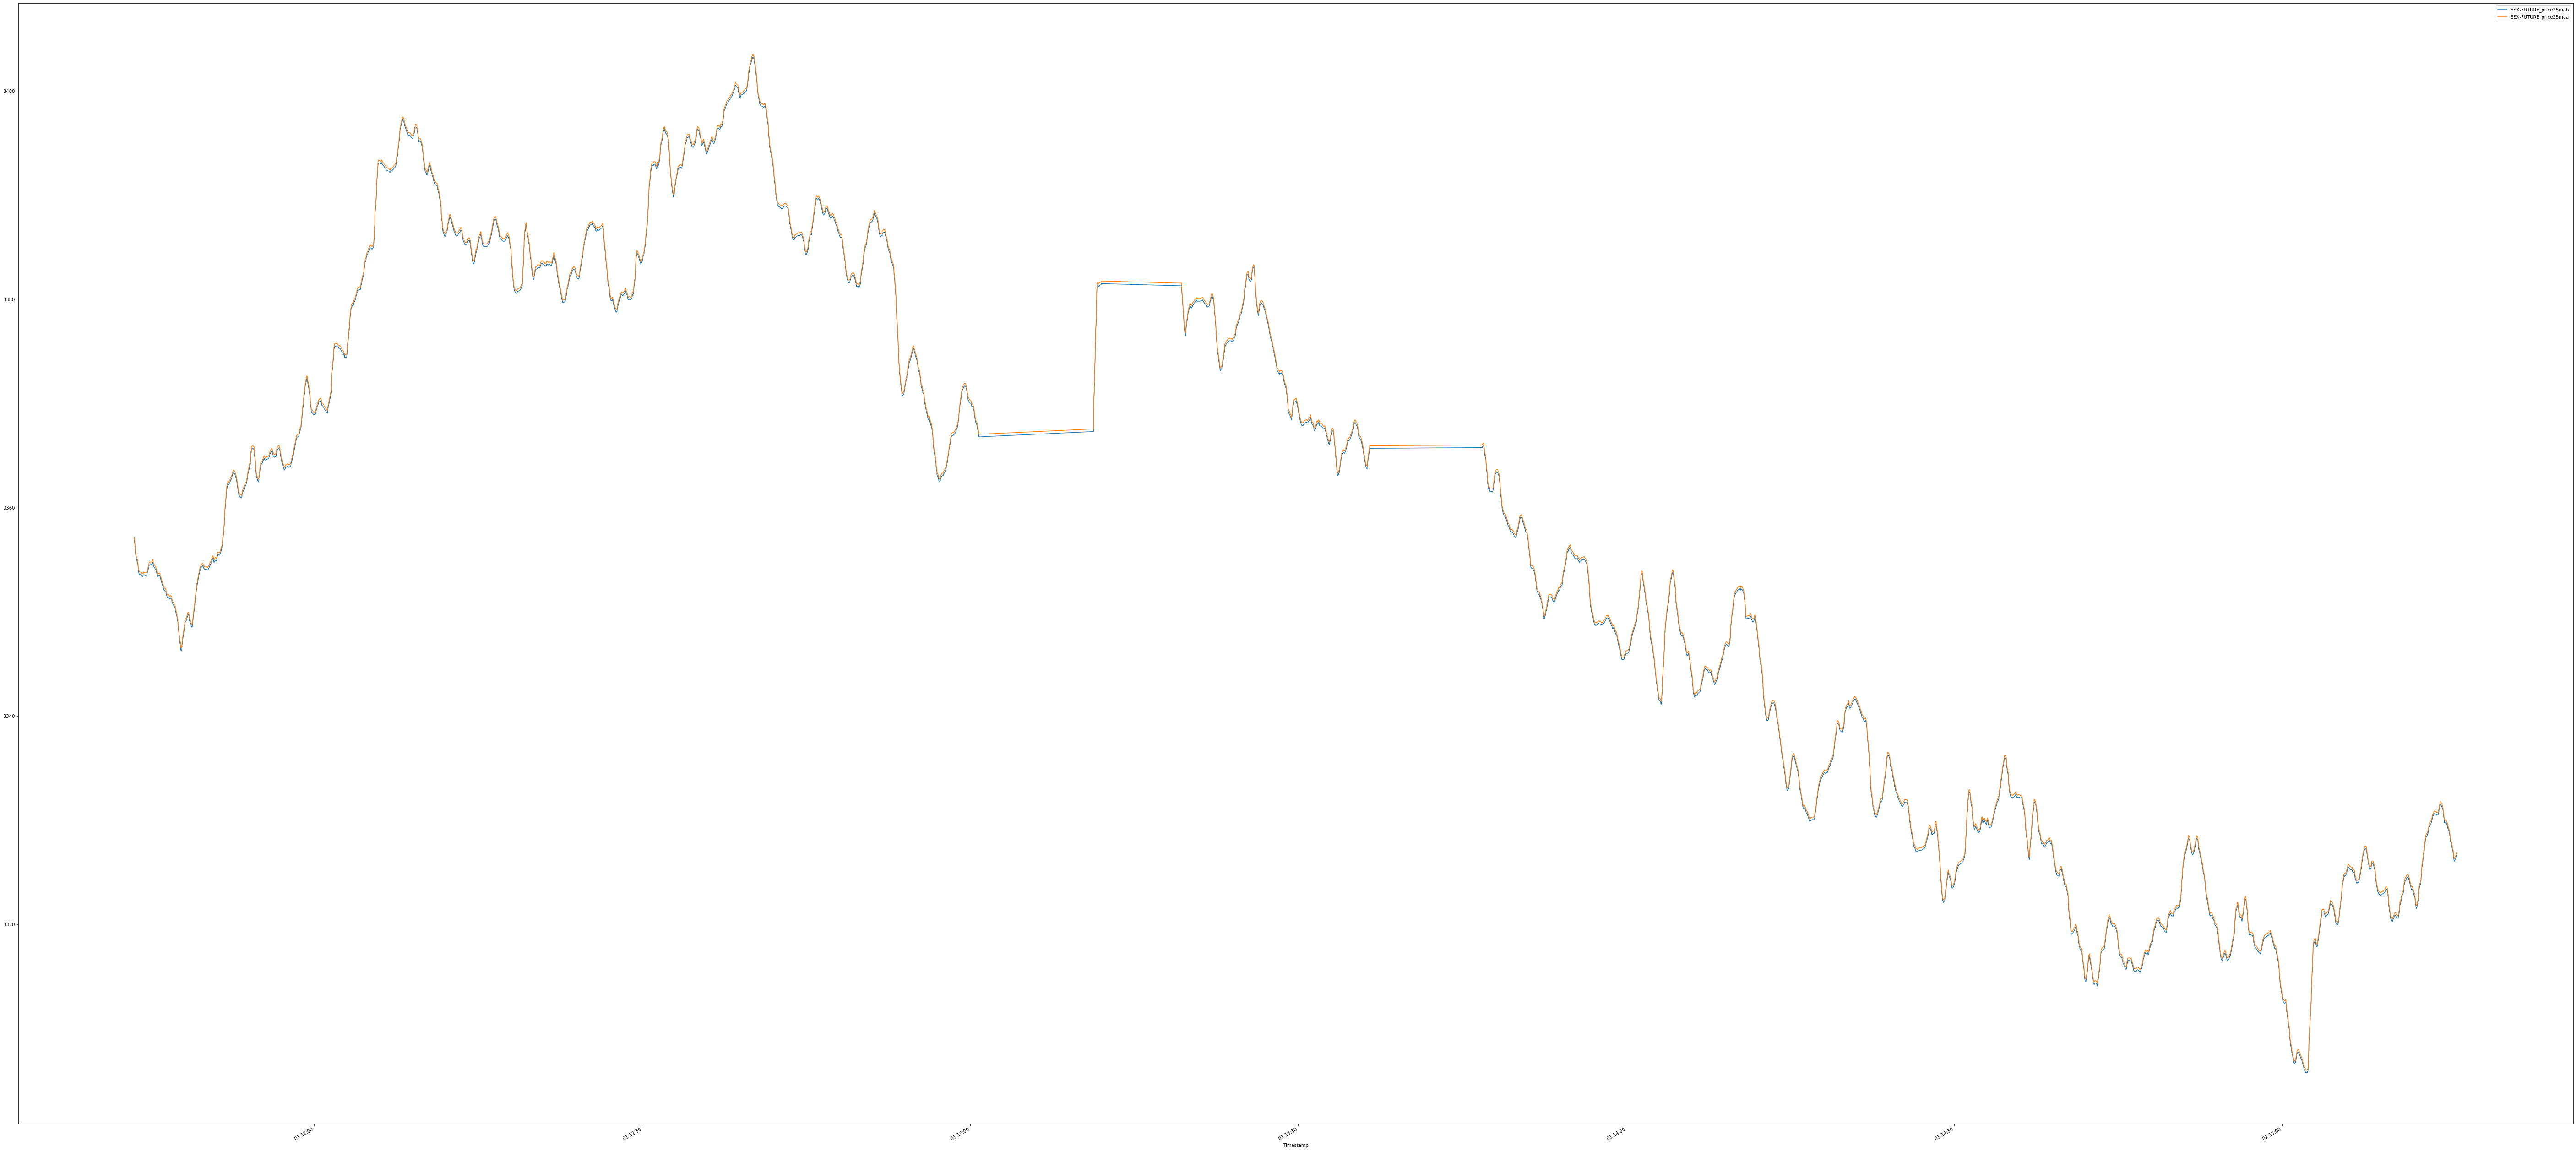

In [69]:
graph_dfESX.dropna().plot(figsize=(100,50), legend=True)

In [73]:
graph_dfSP = graph_df[['SP-FUTURE_price25mab', 'SP-FUTURE_price25maa']]

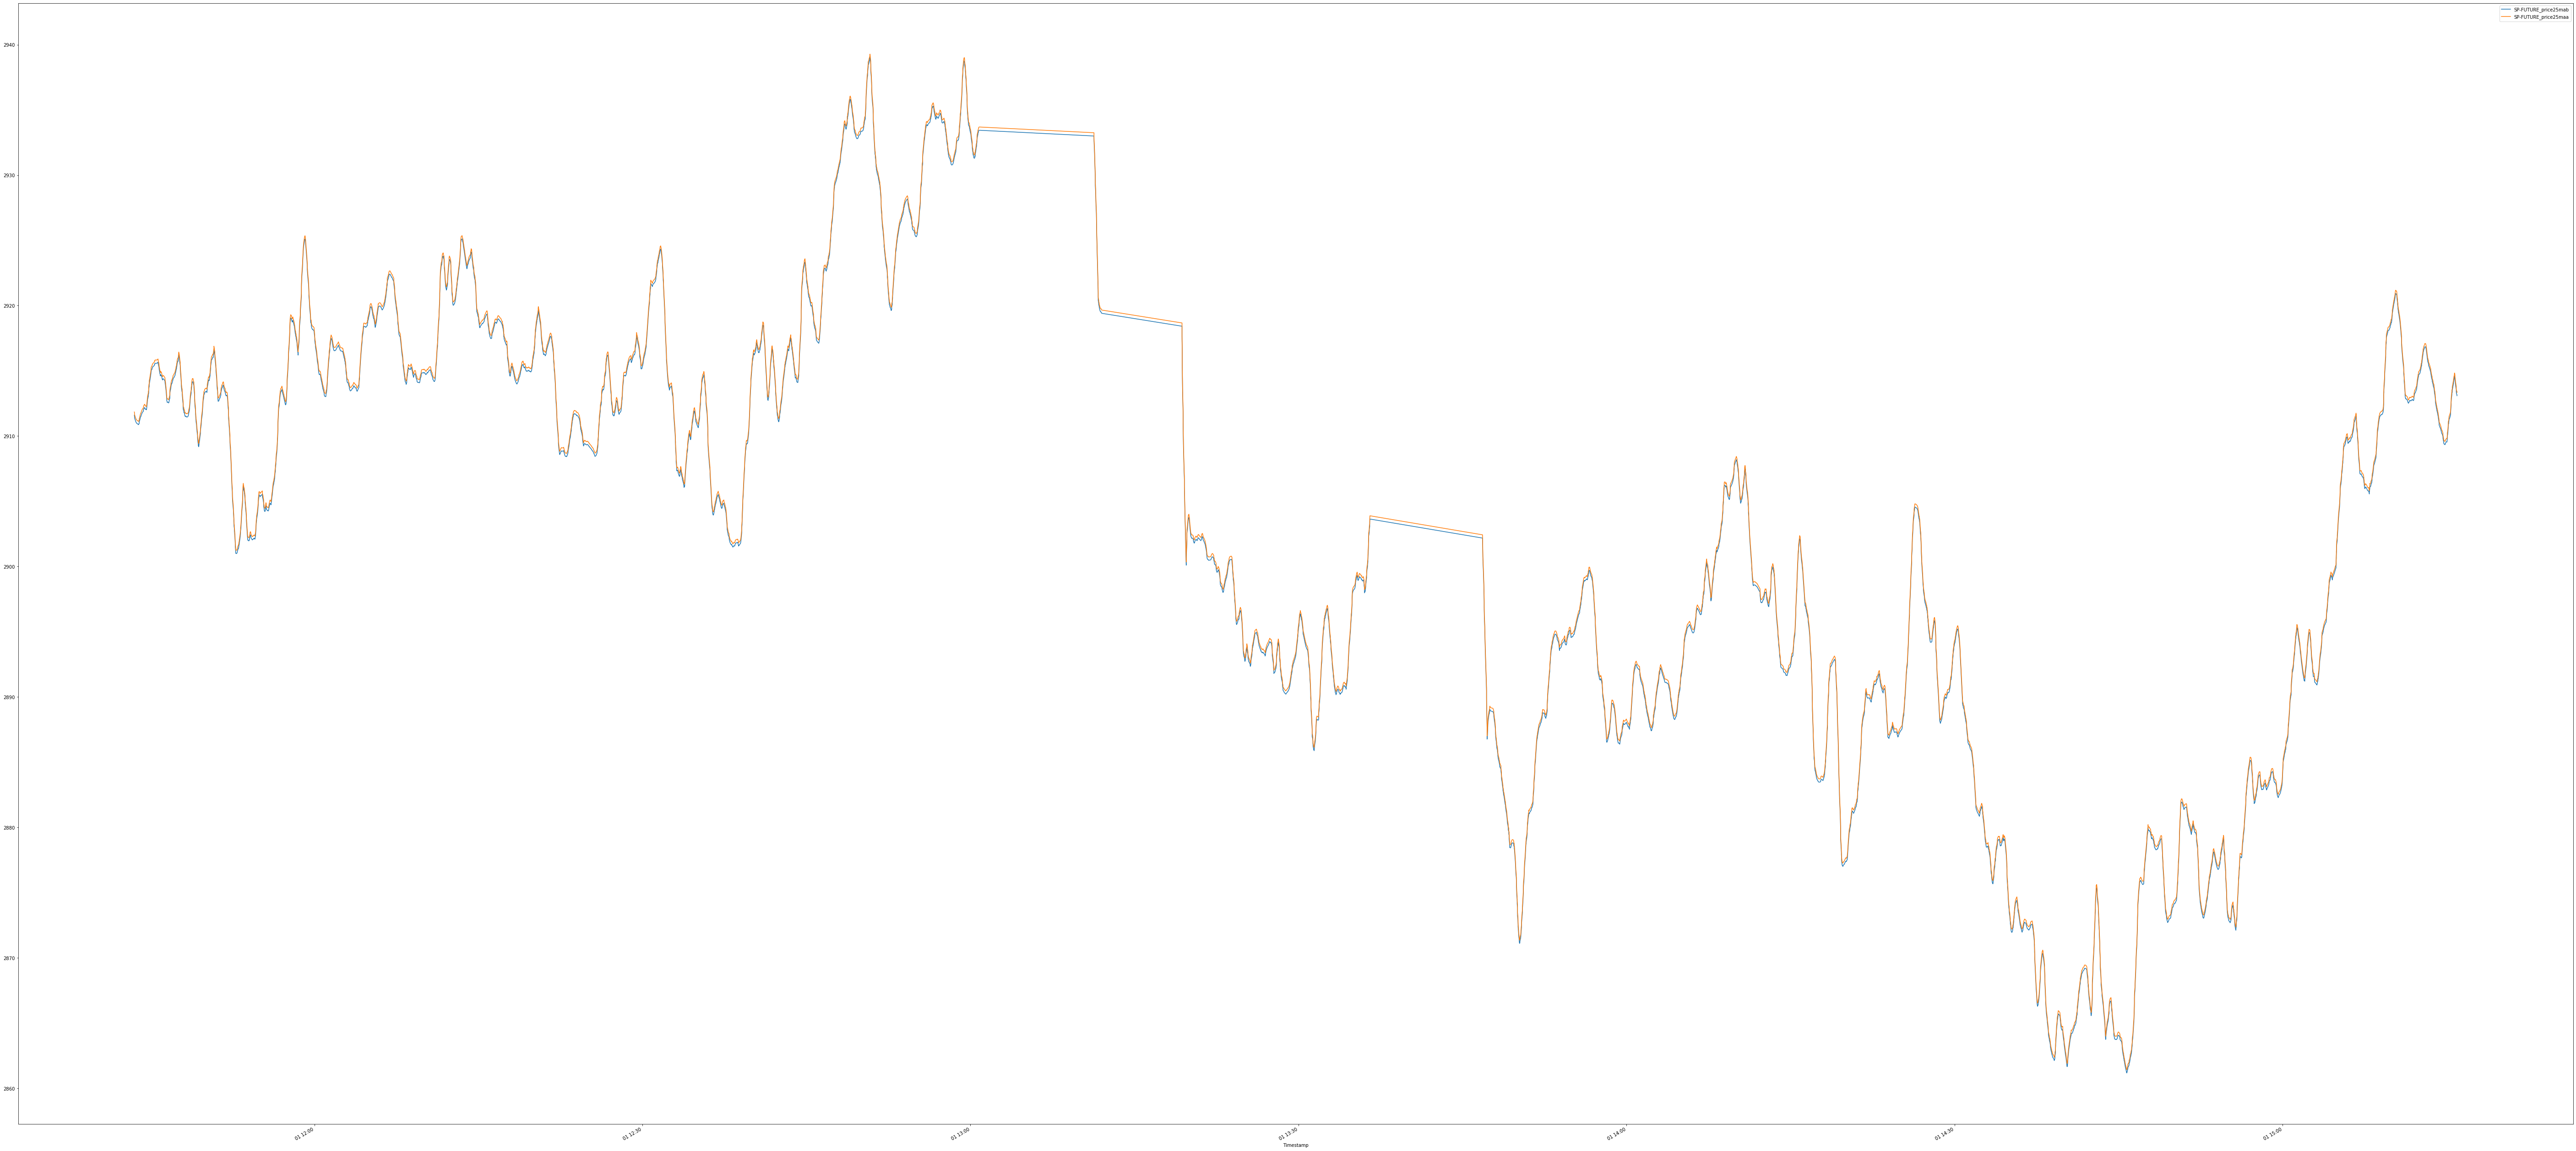

In [74]:
graph_dfSP.dropna().plot(figsize=(100,50), legend=True)